# Respiratory Rate Estimation

Seismocardiography ([SCG](https://www.ncbi.nlm.nih.gov/pubmed/24111357)) is a very promising technique to measure the Heart Rate (HR) and Respiratory Rate (RR) with a detector positioned above the sternum. It is generally based on accelerometer and gyroscope readings or a combination of them. 

Ballistocardiography ([BCG](https://en.wikipedia.org/wiki/Ballistocardiography)) is an another technique to estimate heart and respiratory rate with a combination of both an accelerometer and a gyroscope. It is an indirect evaluation of HR and RR since the contact between the device and the body of the subject is not required (e.g., the accelerometer platform can be mounted under the slats of the bed).   
  
MuSe (Multi-Sensor miniaturized, low-power, wireless [IMU](https://en.wikipedia.org/wiki/Inertial_measurement_unit)) is an Inertial Measurement Unit (IMU) provided by [221e](https://www.221e.com). In the context of this project, it allows to record the inertial data necessary for the estimation of SCG and BCG.

The goal of this assignment is to estimate the respiratory rate of an healthy subject, given the linear acceleration and angular velocity measurements recorded by using the aforementioned MuSe platform.

The study must be performed on two datasets: the first is the compulsory one (`center_sternum.txt`), while the second is left at the discretion of the group, among those made available for the assignment.

*Remember that normal heart rate is around [40-100] bpm.*


## Data

The data is provided in `.txt` files. During this study, two healthy subjects were involved with their informed consent. The first dataset was recorded on one subject, while all the other datasets were recorded on the second subject. 

This is the first mandatory file:

* `center_sternum.txt`: MuSe placed on the center of the sternum. The subject was lying supine on his left and right side, respectively. 


Choose one of the following files in order to complete the task.

* `1_Stave_supine_static.txt`: Sensor placed on a bed stave, under the mattress at the level of the chest. The subject was lying supine on his left and right side. 
* `2_Mattress_supine.txt`: Sensor placed on the mattress, near one corner but not under the pillow. The subject laid in the same position as above. 
* `3_Subject_sitting_chair.txt`: Sensor placed on the desk: the subject, sitting on a chair, leaned forearms and hands on the desk. 
* `4_Chest_sweater.txt`: Sensor placed on the subject chest directly on a sweater. 
* `5_Under_chair.txt`: Subject sitting on a chair, sensor placed under the seat of the chair. 

All `.txt` files have 16 columns, containing: 

* Log Freq stands for the acquisition in Hz (i.e., sampling interval is constant).
* AccX, AccY, AccZ are the measured magnitude of linear acceleration along each axis.
* GyroX, GyroY, GyroZ are the measured magnitude of angular velocity along each axis.
* MagnX, MagnY, MagnZ are the measured magnitude of magnetic field along each axis.
* qw, qi, qj, qk are the quaternion components, representing the spatial orientation of the Muse system.

Each dataset includes, in addition to the data, one file containing the adopted configuration of the MuSe(`config_1.txt` for the first measurement, and in `config_5.txt` for the other measurement).
 


## Assignment



1. Data preparation:

    1.1. Load the txt files and select only the columns you are interested in, in order to do a complete data analysis (e.g. Log Freq, AccX, ... )
    
    1.2. Plot selected data as a function of time and choose a proper time window over which to perform the analysis. Pay attention on the time representation and the measurement unit.
    
    1.3. In order to do a proper job, decide whether to consider some particular axis or some combination of them as well as derived features for the next step of the task. Motivate your choice.  


    
2. Time and frequency analysis:

    2.1. Statistical analysis: provide a statistical description of the chosen dataset. Statistical descriptors includes for example mean, median, variance, standard deviation, 25th and 75th percentiles, and correlation coefficients. Investigate what could be the most interesting descriptors for this type of data, motivating the choices.
    
    2.2. Fourier Analysis: Perform a frequency analysis of the data. Look at the spectrum and explain what you see. Use the Fourier analysis to properly design the filters in the following step. 



3. Filter:
    
    Implement your own filter, trying to extrapolate the respiratory rate signal. Hints:
    
    (a) Directly from Fourier Analysis, look for the most interesting frequency band.
    
    (b) Choose the appropriate Lowpass/Bandpass/Highpass filter.
        
    (c) Explore another methods by yourselves.
    
    Remember to always motivate your choice.
    
    
4. Metrics:

    4.1. Respiratory Rate Per Minute (RPM): extrapolate RPM, and make an histogram of the result. Does it follow a particular distribution?

    4.2. Respiratory Rate Variability (RRV): extrapolate RRV, explain why this parameter is important, and plot the results.


5. **Optional**: Elaborate a simple algorithm to extrapolate the respiratory rate even when the filter fails (e.g. look for a particular threshold...).  



6. Conclusion: 

    Summarise the obtained results, and specifically make a comparison between the two files analysed. Highlight the limitations and the critical issues encountered during the work, motivating the most relevant contribution given by your solution.

# 0. Block Diagram of Processing Chain
<img src="WorkFlowPy.jpeg" width=800 height=800 />

# 1. Data preparation (Summary and exploration)

**1.1 Load the txt files and select only the columns you are interested in, in order to do a complete data analysis**

Load data from text files, select relevant features, analyze data in steady region. \
After exploring the 'Timestamps' values, it is clear that the sampling frequency is not constant during each interval of duration equals to 1 second. \
In particular, with an exception for the first and last interval of the recording, the analysis shows that the sampling frequency takes 2 distinct values. \
These values are 210 samples/s and 224 samples/s for the `center_sternum.txt` dataset and they are 98 samples/s and 112 samples/s for all the other datasets. \
Moreover, the Timestamps can have an initial discontinuity, so it is necessary to remove the samples corresponding to lowest and the highest timestamps.

       Log Mode  Log Freq     Timestamp          AccX          AccY  \
count   16506.0   16506.0  1.650600e+04  16506.000000  16506.000000   
mean        5.0     200.0  1.576223e+09     35.603752    121.754422   
std         0.0       0.0  2.189258e+01    232.624330     62.077114   
min         5.0     200.0  1.576223e+09   -722.118000   -387.838000   
25%         5.0     200.0  1.576223e+09    -35.258000    111.020000   
50%         5.0     200.0  1.576223e+09    -29.585000    115.900000   
75%         5.0     200.0  1.576223e+09    -22.692000    120.475000   
max         5.0     200.0  1.576223e+09   1228.601000   1004.609000   

               AccZ         GyroX         GyroY         GyroZ         MagnX  \
count  16506.000000  16506.000000  16506.000000  16506.000000  16506.000000   
mean    -897.001465     -1.885665      3.636535     -0.818354   -231.327881   
std      215.230574     13.223364     17.399954     10.595643     67.200320   
min    -1731.973000   -359.496200   -213.557

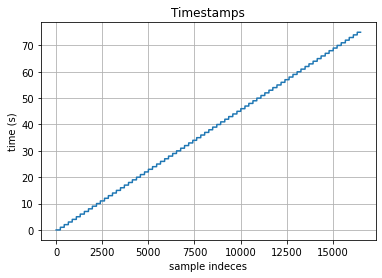


Unique times statistics:
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75], dtype=int64), array([224, 210, 224, 210, 224, 210, 224, 224, 210, 224, 210, 224, 210,
       224, 210, 224, 210, 224, 210, 224, 210, 224, 210, 224, 224, 210,
       224, 210, 224, 210, 224, 210, 224, 224, 210, 224, 210, 224, 210,
       224, 210, 224, 210, 224, 224, 210, 224, 210, 224, 210, 224, 210,
       224, 210, 224, 224, 210, 224, 210, 224, 210, 224, 210, 224, 224,
       210, 224, 210, 224, 210, 224, 224, 210, 224, 210, 182], dtype=int64))

Samples per time stamp and their occurences:
 (array([182, 210, 224], dtype=int64), array([ 1, 34, 41], dtype=int64))
       Log Mode  Log Freq     Timestamp          AccX         

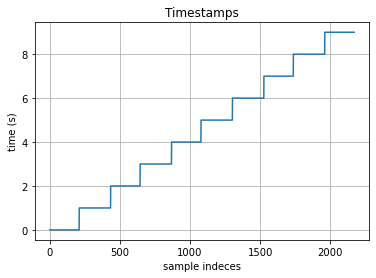


Unique times statistics:
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74], dtype=int64), array([210, 224, 210, 224, 210, 224, 224, 210, 224, 210, 224, 210, 224,
       210, 224, 210, 224, 210, 224, 210, 224, 210, 224, 224, 210, 224,
       210, 224, 210, 224, 210, 224, 224, 210, 224, 210, 224, 210, 224,
       210, 224, 210, 224, 224, 210, 224, 210, 224, 210, 224, 210, 224,
       210, 224, 224, 210, 224, 210, 224, 210, 224, 210, 224, 224, 210,
       224, 210, 224, 210, 224, 224, 210, 224, 210, 182], dtype=int64))

Samples per time stamp and their occurences:
 (array([182, 210, 224], dtype=int64), array([ 1, 34, 40], dtype=int64))


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# select and load dataset
dataselector = 0
if dataselector == 0:
    df = pd.read_csv('center_sternum.txt', sep='\t')
elif dataselector == 1:
    df = pd.read_csv('1_Stave_supine_static.txt', sep='\t')
elif dataselector == 2:
    df = pd.read_csv('2_Mattress_supine.txt', sep='\t')
elif dataselector == 3:
    df = pd.read_csv('3_Subject_sitting_chair.txt', sep='\t')
elif dataselector == 4:
    df = pd.read_csv('4_Chest_sweater.txt', sep='\t')
else:
    df = pd.read_csv('5_Under_chair.txt', sep='\t')

# explore the data set via its summary
print(df.describe())

Nsamples = df.shape[0]
print('\nNum samples = ', Nsamples)

# explore unique values in data set
n = df.nunique(axis=0)
print('\nUnique values:\n', n)
  
# explore unique times
timestamps = df['Timestamp'].values

# For convenience, set to 0 the time reference at the start of the recodding
timestamps -= timestamps[0]

# After plotting the timestamps an initial discontinuity in timestamps can be notices
# for some of the dataset
plt.plot(timestamps)
plt.xlabel('sample indeces')
plt.ylabel('time (s)')
plt.grid('on')
plt.title('Timestamps')
plt.show()

# investigate sampling interval
uniqueTimes, countUniqueTimes = np.unique(timestamps, return_counts=True)
print('\nUnique times statistics:\n', np.unique(timestamps, return_counts=True))

# count the occurences of the different samplig rates used in distinct 1 second intervals
print('\nSamples per time stamp and their occurences:\n', np.unique(countUniqueTimes, return_counts=True))

# Remove the discontinuity by selecting samples starting after
# the initial first second of the recording
dfclean = df[timestamps >= 1]
print(dfclean.describe())

timestamps = dfclean['Timestamp'].values
# For convenience, set to 0 the time reference at the start of the recodding
timestamps -= timestamps[0]

# timestamps are rounded to seconds, sampling rate is not constant in distinct 1 second intervals
plt.plot(timestamps[timestamps < 10])
plt.xlabel('sample indeces')
plt.ylabel('time (s)')
plt.grid('on')
plt.title('Timestamps')
plt.show()

# investigate sampling interval
uniqueTimes, countUniqueTimes = np.unique(timestamps, return_counts=True)
print('\nUnique times statistics:\n', np.unique(timestamps, return_counts=True))

# count the occurences of the different samplig rates used in distinct 1 second intervals
print('\nSamples per time stamp and their occurences:\n', np.unique(countUniqueTimes, return_counts=True))

The processed data to be used in next steps is in **'dfclean' dataframe**

# 1. Data preparation (Plots)

**1.2  Plot selected data as a function of time and choose a proper time window over which to perform the analysis**

In order to cope with the switch between 2 different sampling rates, it is convenient to resample the signals during the intervals where the sampling rate takes its lowest value. \
This resampling is performed with scipy.signal.resample in order to have a constant sampling frequency corresponding to the highest available.

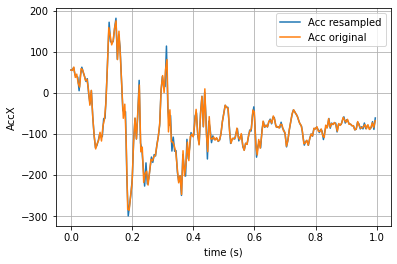

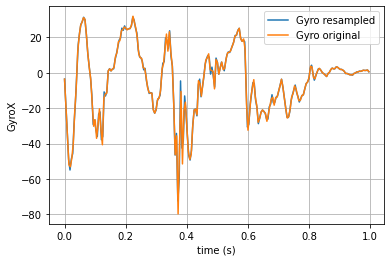

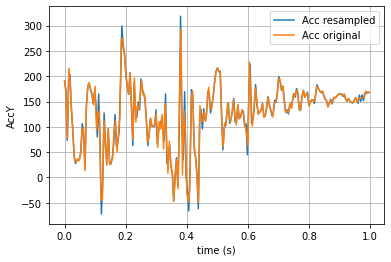

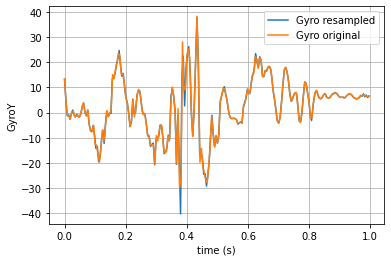

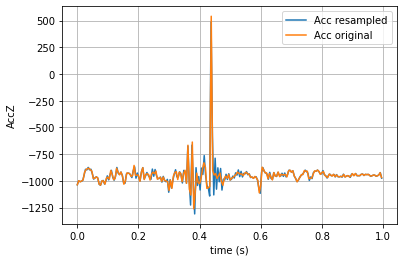

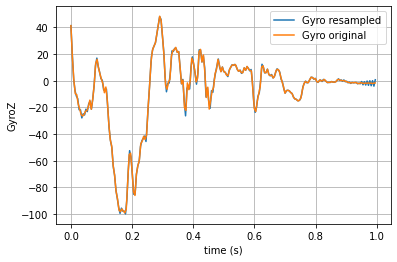

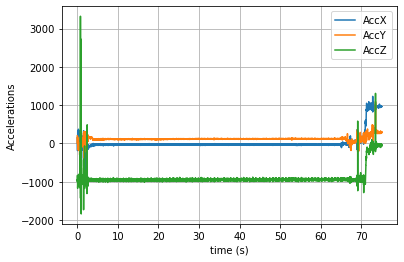

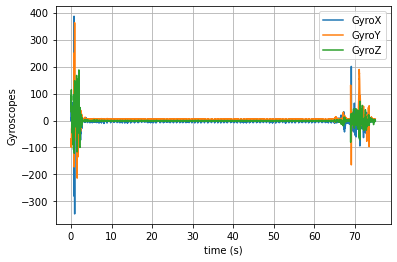

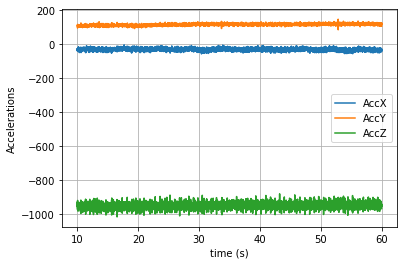

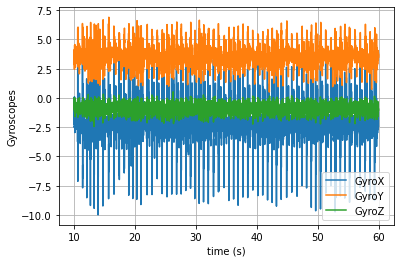

In [12]:
from scipy import signal
from scipy import fftpack

def plotResampling(time_signal, signaloriginal, time_signalResampled, signalResampled, label, ylabel):
    plt.plot(time_signalResampled, signalResampled, label=label + ' resampled')
    plt.plot(time_signal, signaloriginal, label=label + ' original')
    plt.ylabel(ylabel)
    plt.xlabel('time (s)')
    plt.legend()
    plt.grid('on')
    plt.show()

def signalResampling(df, debugplot = False, boolShowAcceleration = True):
    """
    signalResampling resamples the acceleration and gyroscope
    components in dataframe from MUSE sensor to the highest
    sampling rate present in the recorded dataframe.

    :param df: dataframe from MUSE data set with 'Timestamp', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ'
    :return: filtered signal
    """     
    timestamps = df['Timestamp']
    uniqueTimes, countUniqueTimes = np.unique(timestamps, return_counts=True)
    SamplingRates, counts = np.unique(countUniqueTimes, return_counts=True)
    Accelerations = df[['AccX', 'AccY', 'AccZ']].values
    Gyroscopes = df[['GyroX', 'GyroY', 'GyroZ']].values
    
    Acclabels = ['AccX', 'AccY', 'AccZ']
    Gyrolabels = ['GyroX', 'GyroY', 'GyroZ']
    SamplingFreq = SamplingRates.max()
    numOneSecondIntervals = np.sum(counts)
    Nsamples = numOneSecondIntervals * SamplingFreq
    AccelerationsResampled = np.zeros((Nsamples, 3))
    GyroscopesResampled = np.zeros((Nsamples, 3))
    SamplingInterval = 1 / SamplingFreq
    times = np.linspace(0.0, Nsamples * SamplingInterval, num=Nsamples, endpoint=False)
    index = 0
    index1 = 0
    cnt = 0
    for n in countUniqueTimes:
        if n != SamplingFreq:
            AccelerationsResampled[index1:index1 + SamplingFreq,:] = signal.resample(Accelerations[index:index + n,:], SamplingFreq)
            GyroscopesResampled[index1:index1 + SamplingFreq,:] = signal.resample(Gyroscopes[index:index + n,:], SamplingFreq)

            # Plot for visual debug of resampled signals
            if (debugplot == True) and (cnt >= 1) and (cnt < 2):
                t1 = np.linspace(0.0, 1, num=n, endpoint=False)
                t2 = np.linspace(0.0, 1, num=SamplingFreq, endpoint=False)
                # Plot to test resampling signals
                for indexComponent in range(3):
                    signalResampled = AccelerationsResampled[index1:index1 + SamplingFreq,indexComponent]
                    signaloriginal = Accelerations[index:index + n,indexComponent]
                    plotResampling(t1, signaloriginal, t2, signalResampled, 'Acc', Acclabels[indexComponent])

                    signalResampled = GyroscopesResampled[index1:index1 + SamplingFreq,indexComponent]
                    signaloriginal = Gyroscopes[index:index + n,indexComponent]
                    plotResampling(t1, signaloriginal, t2, signalResampled, 'Gyro', Gyrolabels[indexComponent])
            cnt = cnt + 1
        else:
            AccelerationsResampled[index1:index1 + SamplingFreq,:] = Accelerations[index:index + SamplingFreq,:]
            GyroscopesResampled[index1:index1 + SamplingFreq,:] = Gyroscopes[index:index + SamplingFreq,:]
            
        index = index + n
        index1 = index1 + SamplingFreq

    return SamplingFreq, times, AccelerationsResampled, GyroscopesResampled

def plotData(timeHorizontalAxis, dataVerticalAxis, labels, ylabel):
    plt.plot(timeHorizontalAxis, dataVerticalAxis, label = labels)
    plt.grid('on')
    plt.xlabel('time (s)')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

#debugplot = False
debugplot = True
boolShowAcceleration = False
newFreq, newtimes, newAccelerations, newGyroscopes = signalResampling(dfclean, debugplot, boolShowAcceleration)

plotData(newtimes, newAccelerations, ['AccX', 'AccY', 'AccZ'], 'Accelerations')

plotData(newtimes, newGyroscopes, ['GyroX', 'GyroY', 'GyroZ'], 'Gyroscopes')
        
# select a time interval where signals are clean, avoid initial
# and final noisy parts.
if dataselector == 0: # center_sternum.txt
    t_start, t_end = 10, 60
elif dataselector == 1: # 1_Stave_supine_static.txt
    t_start, t_end = 20, 80
elif dataselector == 2: # 2_Mattress_supine.txt
    t_start, t_end = 20, 100
elif dataselector == 3: # 3_Subject_sitting_chair.txt
    t_start, t_end = 5, 65
elif dataselector == 4: # 4_Chest_sweater.txt
    t_start, t_end = 10, 140
else: # 5_Under_chair.txt
    t_start, t_end = 10, 90

indexmask = (newtimes >= t_start) & (newtimes < t_end)
times_cleaned = newtimes[indexmask]
Accelerations = newAccelerations[indexmask]
Gyroscopes = newGyroscopes[indexmask]
SamplingInterval = 1 / newFreq

# plot of selected time inteval choosen for the following inspection
plotData(times_cleaned, Accelerations, ['AccX', 'AccY', 'AccZ'], 'Accelerations')
plotData(times_cleaned, Gyroscopes, ['GyroX', 'GyroY', 'GyroZ'], 'Gyroscopes')

**1.3. In order to do a proper job, decide whether to consider some particular axis or some combination of them as well as derived features for the next step of the task. Motivate your choice**

In [13]:
time_Acc_Gyro = np.column_stack((times_cleaned, np.concatenate((Accelerations, Gyroscopes), axis=1)))

**The processed data to be used in next steps are in:**\
• times_cleaned (reference time line)\
• Accelerations resampled acceleration components\
• Gyroscopes resampled gyroscopes components\
• SamplingInterval = corresponding to the constant sampling interval of resampled signals\
• newFreq = corresponding to the constant sampling frequency of resampled signals

# 2. Time and frequency analysis

**2.1. Statistical analysis: provide a statistical description of the chosen dataset.
Statistical descriptors includes for example mean, median, variance, standard deviation, 25th and 75th percentiles,and correlation coefficients. Investigate what could be the most interesting descriptors for this type of data, motivating the choices**

In [14]:
dfFeatures = pd.DataFrame(time_Acc_Gyro, columns=['Timestamp', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ'])
correlation = dfFeatures.corr().round(2)

print(dfFeatures.corr().round(2))

dfFeatures.describe()

           Timestamp  AccX  AccY  AccZ  GyroX  GyroY  GyroZ
Timestamp       1.00 -0.16  0.53  0.24  -0.03  -0.05  -0.03
AccX           -0.16  1.00 -0.20 -0.43   0.21   0.01   0.02
AccY            0.53 -0.20  1.00  0.16  -0.04  -0.01  -0.13
AccZ            0.24 -0.43  0.16  1.00  -0.07   0.12   0.02
GyroX          -0.03  0.21 -0.04 -0.07   1.00   0.40   0.39
GyroY          -0.05  0.01 -0.01  0.12   0.40   1.00   0.44
GyroZ          -0.03  0.02 -0.13  0.02   0.39   0.44   1.00


,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000
mean,34.997768,-30.526464,115.497175,-949.205349,-2.090791,3.679602,-0.868365
std,14.434401,6.969289,5.296723,14.332540,1.410699,0.713357,0.361885
min,10.000000,-56.827987,85.217374,-1015.528000,-10.000000,0.503817,-2.441853
25%,22.498884,-35.136000,112.057000,-957.511336,-2.687023,3.267176,-1.100737
50%,34.997768,-30.439000,115.702792,-949.709000,-2.156529,3.633588,-0.854962
75%,47.496652,-25.867522,118.955331,-941.371744,-1.492816,4.000000,-0.625954
max,59.995536,-3.383101,147.224211,-879.742000,4.427481,6.900944,0.525322


**2.2 Fourier Analysis: Perform a frequency analysis of the data. Look at the spectrum and explain what you see. Use the Fourier analysis to properly design the filters in the following step**

1043.5979440045166


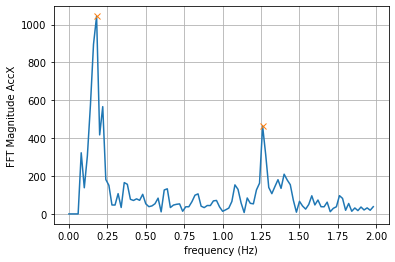

Peak frequencies =  [0.18 1.26]
HR (bpm) =  75.6
RR (bpm) =  10.799999999999999
721.7434470185959


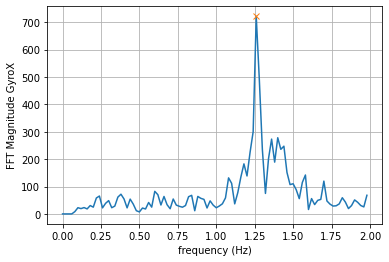

Peak frequencies =  [1.26]
HR (bpm) =  75.6
441.5569583854189


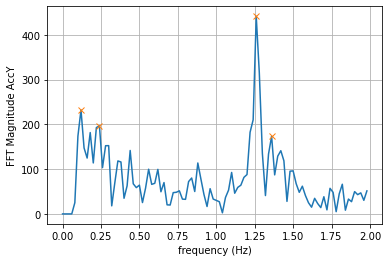

Peak frequencies =  [0.12 0.24 1.26 1.36]
HR (bpm) =  81.60000000000001
RR (bpm) =  14.399999999999999
1325.3550171951958


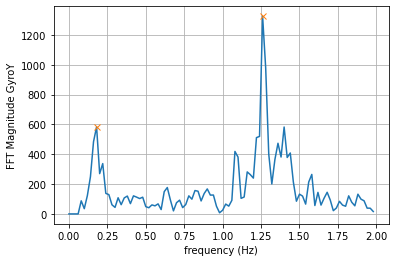

Peak frequencies =  [0.18 1.26]
HR (bpm) =  75.6
RR (bpm) =  10.799999999999999
138.03831813560538


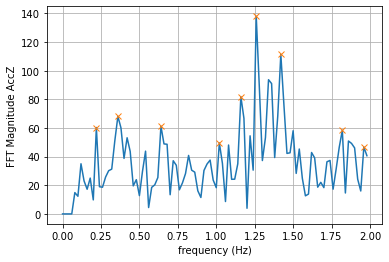

Peak frequencies =  [0.22 0.36 0.64 1.02 1.16 1.26 1.42 1.82 1.96]
HR (bpm) =  85.19999999999999
RR (bpm) =  13.2
728.7915735724722


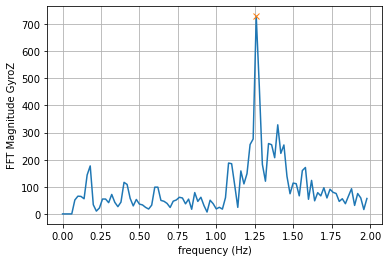

Peak frequencies =  [1.26]
HR (bpm) =  75.6
HR frequencies: [75.6, 75.6, 81.60000000000001, 75.6, 85.19999999999999, 75.6]
RR frequencies: [10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2]


In [15]:
from sklearn import preprocessing

def computeFFTs(Accelerations, Gyroscopes):
    """
    computeFFTs returns the hamming windowed FFTs of
    input Accelarations and Gyroscopes signals.

    :param Accelerations: numpy array with Nsamples of 3D acceleration components
    :param Gyroscopes:  numpy array with samples of 3D gyroscope components
    :return: fft_Accelerations and fft_Gyroscopes
    """     
    Nsamples = Accelerations.shape[0]
    window = signal.hamming(Nsamples)
    fft_Accelerations = fftpack.fft(Accelerations * window[:, np.newaxis], axis=0)
    fft_Gyroscopes = fftpack.fft(Gyroscopes * window[:, np.newaxis], axis=0)
    return fft_Accelerations, fft_Gyroscopes
    
def compute_HR_RR(fftMagnitude, frequencies, deltaf):
    """
    compute_HR_RR returns the hamming windowed FFTs of
    input Accelarations and Gyroscopes signals.

    :param fftMagnitude: numpy array with FFT magnitudes
    :param frequencies:  numpy array with frequency values
    :param deltaf:  minimum distance between FFT peaks
    :return: peaks indeces, HR_frequency (0 if not detected), RR_frequency (0 if not detected)
    """     
    mask = frequencies < deltaf
    dist = frequencies[mask].shape[0]

    fftMagnitude[frequencies < 0.07] = 0
    maxPeak = fftMagnitude.max()
    print(maxPeak)
    peaks, _ = signal.find_peaks(fftMagnitude, distance=dist, height = maxPeak / 3)
    
    HR_frequencyLow = 40 / 60   # minimum heart rate at rest 40 beats per minute
    HR_frequencyHigh = 100 / 60   # maximum heart rate at rest 100 beats per minute
    HR_frequency = 0
    for freq in frequencies[peaks]:
        if freq >= HR_frequencyLow and freq <= HR_frequencyHigh:
            HR_frequency =  freq

    RR_frequencyLow = 4 / 60   # minimum respiratory rate at rest 4 breaths per minute
    RR_frequencyHigh = 20 / 60   # maximum respiratory rate at rest 20 breaths per minute
    RR_frequency = 0
    for freq in frequencies[peaks]:
        if freq >= RR_frequencyLow and freq <= RR_frequencyHigh:
            RR_frequency =  freq
    
    return peaks, HR_frequency, RR_frequency

def plotFFT(frequencies, fftMagnitude, peaks, YLabel):
    plt.figure()
    plt.plot(frequencies, fftMagnitude)
    plt.plot(frequencies[peaks], fftMagnitude[peaks], 'x')
    plt.xlabel('frequency (Hz)')
    plt.ylabel(YLabel)
    plt.grid('on')
    plt.show()
    
def plotAllFFTs(fft_Accelerations, fft_Gyroscopes, SamplingInterval):
    AccLabel = ['FFT Magnitude AccX', 'FFT Magnitude AccY', 'FFT Magnitude AccZ']
    GyroLabel = ['FFT Magnitude GyroX', 'FFT Magnitude GyroY', 'FFT Magnitude GyroZ']

    frequencies = fftpack.fftfreq(fft_Accelerations.shape[0], SamplingInterval)

    # 2 Hz corresponds to 120 bpm
    frequencymask = (frequencies >= 0) & (frequencies < 2)
    frequencies = frequencies[frequencymask]
    fft_Accelerations_positiveFreq = fft_Accelerations[frequencymask]
    fft_Gyroscopes_positiveFreq = fft_Gyroscopes[frequencymask]

    RR_frequencies = []
    HR_frequencies = []
    for i in range(0,3):
        magnitude = abs(fft_Accelerations_positiveFreq[:,i])
        peaks, HR_frequency, RR_frequency = compute_HR_RR(magnitude, frequencies, 0.1)

        plotFFT(frequencies, magnitude, peaks, AccLabel[i])
    
        print('Peak frequencies = ', frequencies[peaks])

        if HR_frequency > 0:
            print('HR (bpm) = ', HR_frequency * 60)
            HR_frequencies.append(HR_frequency * 60)
        
        if RR_frequency > 0:
            print('RR (bpm) = ', RR_frequency * 60)
            RR_frequencies.append(RR_frequency * 60)

        magnitude = abs(fft_Gyroscopes_positiveFreq[:,i])

        peaks, HR_frequency, RR_frequency = compute_HR_RR(magnitude, frequencies, 0.5)

        plotFFT(frequencies, magnitude, peaks, GyroLabel[i])

        print('Peak frequencies = ', frequencies[peaks])
    
        if HR_frequency > 0:
            print('HR (bpm) = ', HR_frequency * 60)
            HR_frequencies.append(HR_frequency * 60)
        
        if RR_frequency > 0:
            print('RR (bpm) = ', RR_frequency * 60)
            RR_frequencies.append(RR_frequency * 60)
            
    return HR_frequencies, RR_frequencies
    
# Normalize the data prior to FFT analysis (zero the mean and standard deviation equals to 1)
scaler = preprocessing.StandardScaler().fit(Accelerations)
Accelerations_scaled = scaler.transform(Accelerations)

scaler = preprocessing.StandardScaler().fit(Gyroscopes)
Gyroscopes_scaled = scaler.transform(Gyroscopes)

fft_Accelerations_scaled, fft_Gyroscopes_scaled = computeFFTs(Accelerations_scaled, Gyroscopes_scaled)

# Find FFT peaks and detected HR, RR (plot and print)
HR_frequencies, RR_frequencies = plotAllFFTs(fft_Accelerations_scaled, fft_Gyroscopes_scaled, SamplingInterval)

print("HR frequencies:", HR_frequencies)
print("RR frequencies:", RR_frequencies)

**The processed data to be used in next steps are in:**
• times_cleaned (reference time line)\
• Accelerations_scaled resampled and normalized (zero mean, unit standard deviation) acceleration components\
• Gyroscopes_scaled resampled and normalized (zero mean, unit standard deviation) gyroscopes components\
• SamplingInterval = corresponding to the constant sampling interval of resampled signals\
• newFreq = corresponding to the constant sampling frequency of resampled signals

# 3. Filter: Frequency Domain via FFT

**Implement your own filter, trying to extrapolate the respiratory rate signal: \
(a) Directly from Fourier Analysis, look for the most interesting frequency band**

SNRs of RR recovered after filtering Accelerations =  [ -9.07126057 -12.80401914 -20.87356177]
SNRs of RR recovered after filtering Gyroscopes =  [-29.84091747 -14.08686171 -23.74137087]


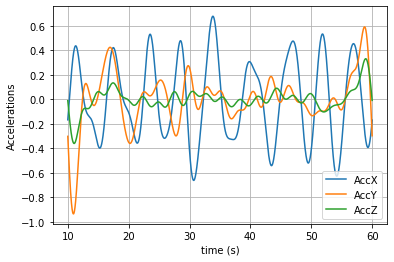

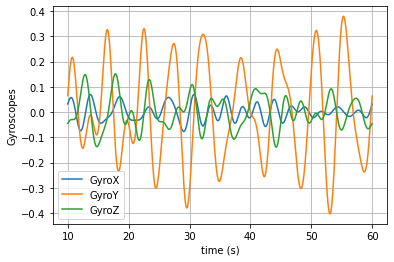

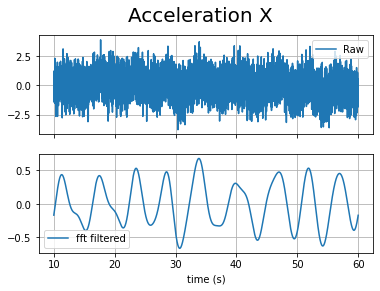

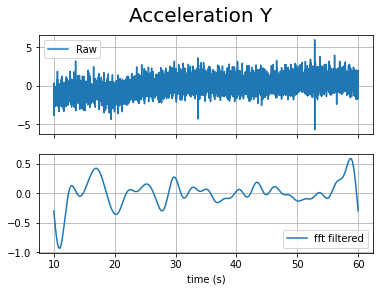

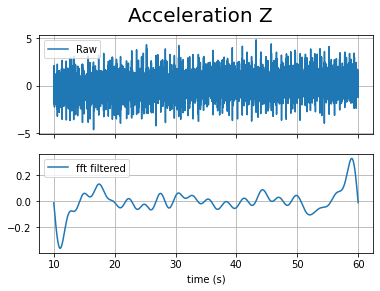

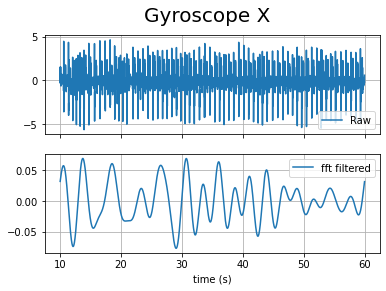

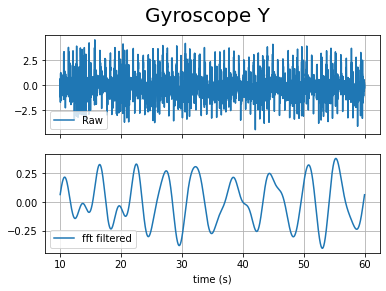

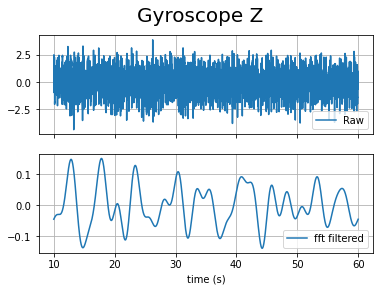

In [16]:
def fftFilter(inputSignal, freqCut):
    sig_fft = fftpack.fft(inputSignal, axis=0)
    sig_frequencies = fftpack.fftfreq(inputSignal.shape[0], SamplingInterval)
    sig_frequencymask = (abs(sig_frequencies) > freqCut) | (abs(sig_frequencies) < 0.07)
    sig_fft[sig_frequencymask] = 0
    sig_filtered = np.real(fftpack.ifft(sig_fft, axis=0))
    return sig_filtered

def plotRawandFiltered(t, rawSignals, filteredSignals, titles, labelfilter):
    for i in range(3):
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        fig.suptitle(titles[i], fontsize=20)
        ax1.plot(t, rawSignals[:,i], label='Raw')
        ax1.grid('on')
        ax1.legend()
        ax2.plot(t, filteredSignals[:,i], label=labelfilter + ' filtered')
        ax2.grid('on')
        ax2.set_xlabel('time (s)')
        ax2.legend()
        plt.show()


freqCut = 0.4
Acc_fftfiltered = fftFilter(Accelerations_scaled, freqCut)
Gyro_fftfiltered = fftFilter(Gyroscopes_scaled, freqCut)

Acc_fftfilteredPower = np.std(Acc_fftfiltered, axis = 0) ** 2
Acc_noisePower = 1- Acc_fftfilteredPower
# Input data are normalizd to unit std
Gyro_fftfilteredPower = np.std(Gyro_fftfiltered, axis = 0) ** 2
# Input data are normalizd to unit std
Gyro_noisePower = 1- Gyro_fftfilteredPower

if dataselector == 0:
    SNRacc0 = 10 *np.log10(Acc_fftfilteredPower/Acc_noisePower)
    SNRgyro0 = 10 *np.log10(Gyro_fftfilteredPower/Gyro_noisePower)
elif dataselector == 3:
    SNRacc3 = 10 *np.log10(Acc_fftfilteredPower/Acc_noisePower)
    SNRgyro3 = 10 *np.log10(Gyro_fftfilteredPower/Gyro_noisePower)

print('SNRs of RR recovered after filtering Accelerations = ', 10 *np.log10(Acc_fftfilteredPower/Acc_noisePower))
print('SNRs of RR recovered after filtering Gyroscopes = ', 10 *np.log10(Gyro_fftfilteredPower/Gyro_noisePower))
      
plotData(times_cleaned, Acc_fftfiltered, ['AccX', 'AccY', 'AccZ'], 'Accelerations')
plotData(times_cleaned, Gyro_fftfiltered, ['GyroX', 'GyroY', 'GyroZ'], 'Gyroscopes')

AccTitles = ['Acceleration X', 'Acceleration Y', 'Acceleration Z']
plotRawandFiltered(times_cleaned, Accelerations_scaled, Acc_fftfiltered, AccTitles, 'fft')

GyroTitles = ['Gyroscope X', 'Gyroscope Y', 'Gyroscope Z']
plotRawandFiltered(times_cleaned, Gyroscopes_scaled, Gyro_fftfiltered, GyroTitles, 'fft')

**More processed data to be used in next steps are in:**\
• Acc_fftfiltered acceleration components\
• Gyro_fftfiltered gyroscopes components

# 3. Filter: Time Domain via Butterworth Filter

**Implement your own filter, trying to extrapolate the respiratory rate signal:\
(b) Choose the appropriate Lowpass/Bandpass/Highpass filter**

SNRs of RR recovered after filtering Accelerations =  [ -9.10981544 -13.7745474  -23.51688334]
SNRs of RR recovered after filtering Gyroscopes =  [-26.09530022 -13.65188795 -21.79756887]


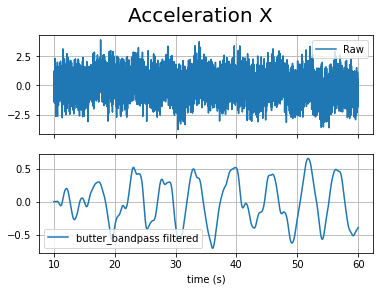

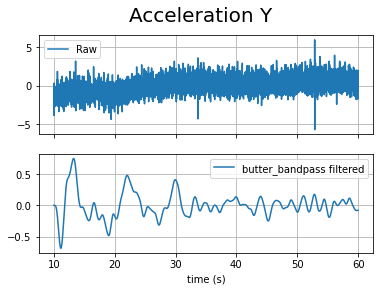

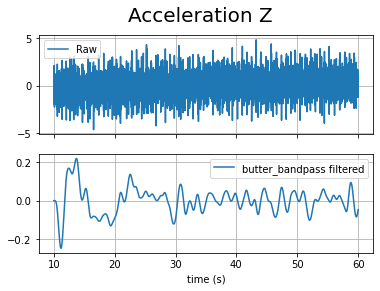

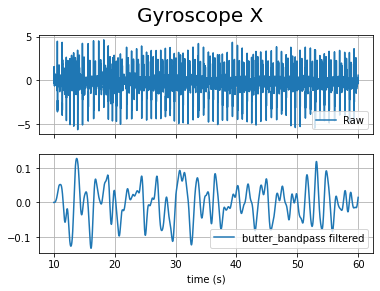

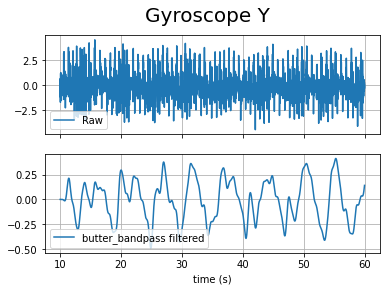

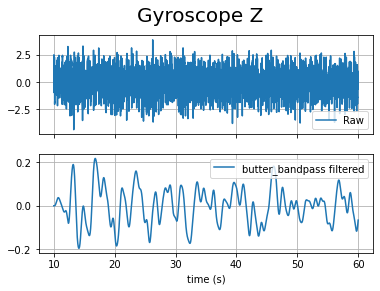

1047.8181712519859


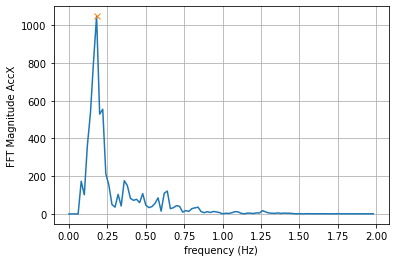

Peak frequencies =  [0.18]
RR (bpm) =  10.799999999999999
76.3271184559343


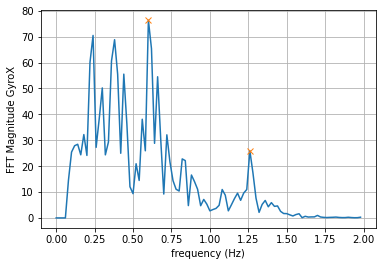

Peak frequencies =  [0.6  1.26]
HR (bpm) =  75.6
321.1052618144503


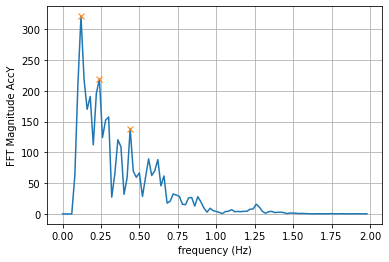

Peak frequencies =  [0.12 0.24 0.44]
RR (bpm) =  14.399999999999999
590.5378559423949


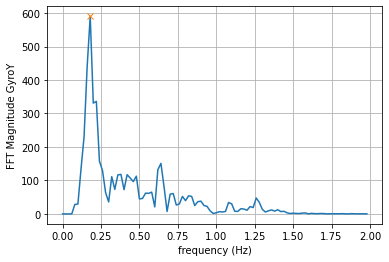

Peak frequencies =  [0.18]
RR (bpm) =  10.799999999999999
79.30528952844351


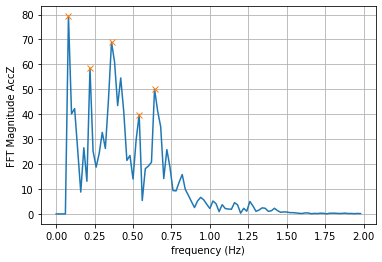

Peak frequencies =  [0.08 0.22 0.36 0.54 0.64]
RR (bpm) =  13.2
184.3218984205957


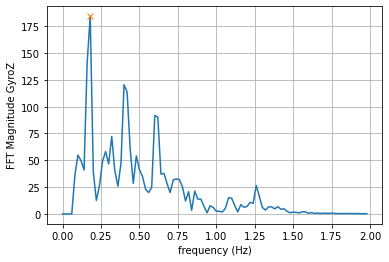

Peak frequencies =  [0.18]
RR (bpm) =  10.799999999999999
HR frequencies: [75.6, 75.6, 81.60000000000001, 75.6, 85.19999999999999, 75.6, 75.6, 75.6]
RR frequencies: [10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999]


In [18]:
def butter_lowpass_filter(data, highcut, fs, order=5):
    """
    butter_bandpass_filter filters input data
    with a lowpass butterworth filter.

    :param data: numpy array with input signal
    :param highcut: high frequency cut
    :param fs: sampling frequency
    :param order: order of butterworth filter
    :return: filtered signal
    """     
    sos = signal.butter(order, highcut, fs=fs, btype='low', output='sos', analog=False)
    y = signal.sosfilt(sos, data, axis=0)

    return y

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    butter_bandpass_filter filters input data
    with a bandpass butterworth filter.

    :param data: numpy array with input signal
    :param lowcut: low frequency cut
    :param highcut: high frequency cut
    :param fs: sampling frequency
    :param order: order of butterworth filter
    :return: filtered signal
    """     
    sos = signal.butter(order, [lowcut, highcut], fs=fs, btype='bandpass', output='sos')
    y = signal.sosfilt(sos, data, axis=0)
    return y

fL = 0.07
fH = 0.7
order=5
fs = newFreq
Accelerations_butterfiltered = butter_bandpass_filter(Accelerations_scaled, fL, fH, fs, order)
Gyroscopes_butterfiltered = butter_bandpass_filter(Gyroscopes_scaled, fL, fH, fs, order)

Acc_butterfilteredPower = np.std(Accelerations_butterfiltered, axis = 0) ** 2
Acc_noisePower = 1- Acc_butterfilteredPower
# Input data are normalizd to unit std
Gyro_butterfilteredPower = np.std(Gyroscopes_butterfiltered, axis = 0) ** 2
# Input data are normalizd to unit std
Gyro_noisePower = 1- Gyro_butterfilteredPower
print('SNRs of RR recovered after filtering Accelerations = ',10 *np.log10(Acc_butterfilteredPower/Acc_noisePower))
print('SNRs of RR recovered after filtering Gyroscopes = ', 10 *np.log10(Gyro_butterfilteredPower/Gyro_noisePower))

plotRawandFiltered(times_cleaned, Accelerations_scaled, Accelerations_butterfiltered, AccTitles, 'butter_bandpass')

plotRawandFiltered(times_cleaned, Gyroscopes_scaled, Gyroscopes_butterfiltered, GyroTitles, 'butter_bandpass')

fft_Accelerations_scaled, fft_Gyroscopes_scaled = computeFFTs(Accelerations_butterfiltered, Gyroscopes_butterfiltered)

# Find FFT peaks and detected HR, RR (plot and print)
HR_frequencies1, RR_frequencies1 = plotAllFFTs(fft_Accelerations_scaled, fft_Gyroscopes_scaled, SamplingInterval)

HR_frequencies.extend(HR_frequencies1)
RR_frequencies.extend(RR_frequencies1)

print("HR frequencies:", HR_frequencies)
print("RR frequencies:", RR_frequencies)

**More processed data to be used in next steps are in:**\
• Accelerations_butterfiltered acceleration components\
• Gyroscopes_butterfiltered gyroscopes components

#  3. Filter: Analysis of  signals Correlation

**Implement your own filter, trying to extrapolate the respiratory rate signal:\
(c) Explore another methods by yourselves**

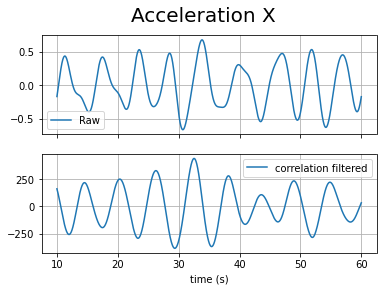

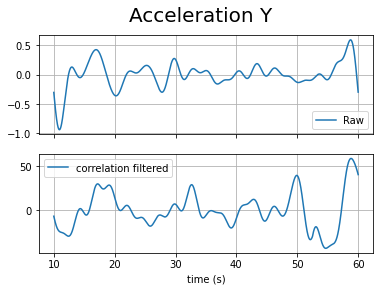

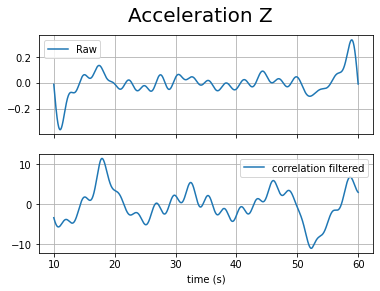

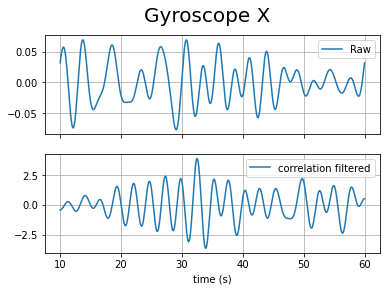

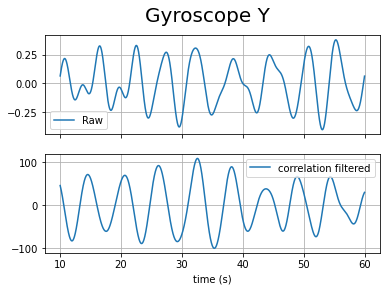

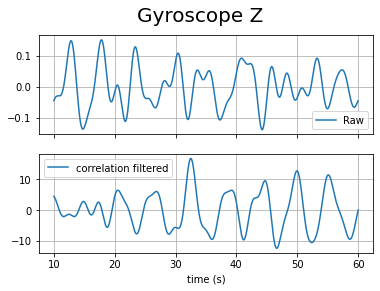

741518.1889216325


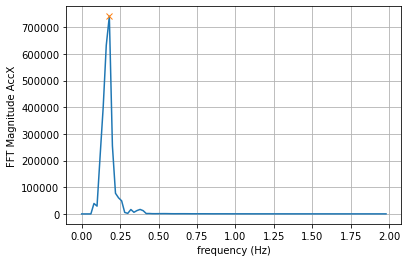

Peak frequencies =  [0.18]
RR (bpm) =  10.799999999999999
4669.219926638189


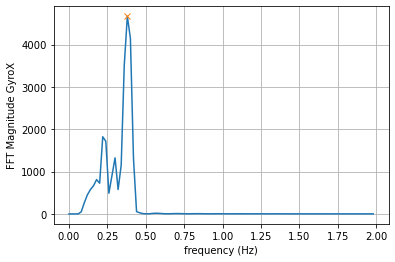

Peak frequencies =  [0.38]
26340.91486989115


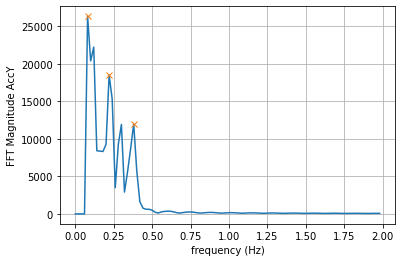

Peak frequencies =  [0.08 0.22 0.38]
RR (bpm) =  13.2
212370.49783010912


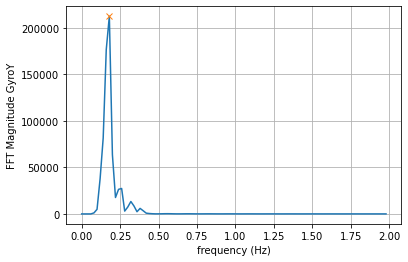

Peak frequencies =  [0.18]
RR (bpm) =  10.799999999999999
9464.552607085358


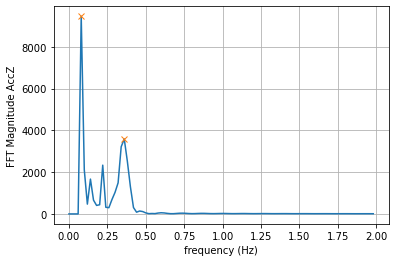

Peak frequencies =  [0.08 0.36]
RR (bpm) =  4.8
22814.096197635925


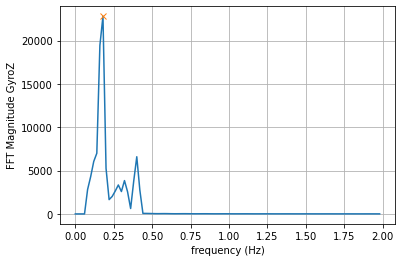

Peak frequencies =  [0.18]
RR (bpm) =  10.799999999999999
HR frequencies: [75.6, 75.6, 81.60000000000001, 75.6, 85.19999999999999, 75.6, 75.6, 75.6]
RR frequencies: [10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 10.799999999999999, 13.2, 10.799999999999999, 4.8, 10.799999999999999]


In [19]:
def plotCorrelateRR(data, mask, index, time):
    dataRR = data[mask] - data[mask].mean()
    dataCorr = np.correlate(dataRR[:, index], data[:, index], 'same')
    return dataCorr

T_RR = 15
# interval duration corresponds to Respiratory Rate time period
t_start = 30
indexRRmask = (times_cleaned >= t_start) & (times_cleaned < t_start + T_RR)

choose_source_signal = 'fft filtered'
#choose_source_signal = 'butter filtered'
#choose_source_signal = 'normalized not filtered'

if choose_source_signal == 'fft filtered':
    Acc_signals = Acc_fftfiltered
    Gyro_signals = Gyro_fftfiltered
elif choose_source_signal == 'butter filtered':
    Acc_signals = Accelerations_butterfiltered
    Gyro_signals = Gyroscopes_butterfiltered
else:
    Acc_signals = Accelerations_scaled
    Gyro_signals = Gyroscopes_scaled

AccCorr = np.zeros(Accelerations_scaled.shape)
for i in range(3):
    AccCorr[:,i] = plotCorrelateRR(Acc_signals, indexRRmask, i, times_cleaned)

GyroCorr = np.zeros(Gyroscopes_scaled.shape)
for i in range(3):
    GyroCorr[:,i] = plotCorrelateRR(Gyro_signals, indexRRmask, i, times_cleaned)


plotRawandFiltered(times_cleaned, Acc_signals, AccCorr, AccTitles, 'correlation')

plotRawandFiltered(times_cleaned, Gyro_signals, GyroCorr, GyroTitles, 'correlation')

fft_Accelerations_scaled, fft_Gyroscopes_scaled = computeFFTs(AccCorr, GyroCorr)

# Find FFT peaks and detected HR, RR (plot and print)
HR_frequencies2, RR_frequencies2 = plotAllFFTs(fft_Accelerations_scaled, fft_Gyroscopes_scaled, SamplingInterval)

HR_frequencies.extend(HR_frequencies2)
RR_frequencies.extend(RR_frequencies2)

print("HR frequencies:", HR_frequencies)
print("RR frequencies:", RR_frequencies)

**More processed data to be used in next steps are in:**\
• Acc_signals acceleration components\
• Gyro_signals gyroscopes components

#  3. Filter: Signals denoising with wavelets (method 1)

**Implement your own filter, trying to extrapolate the respiratory rate signal:\
(c) Explore another method by yourselves**

https://www.kaggle.com/code/theoviel/denoising-with-direct-wavelet-transform

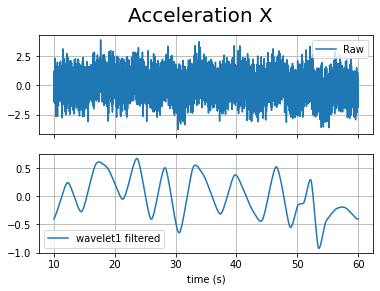

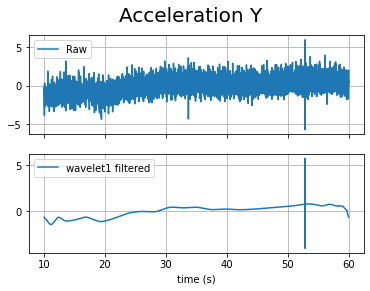

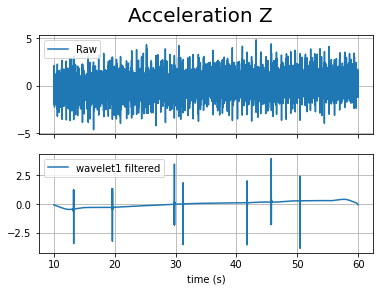

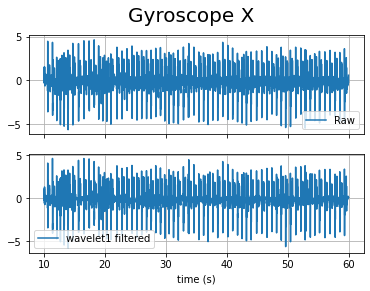

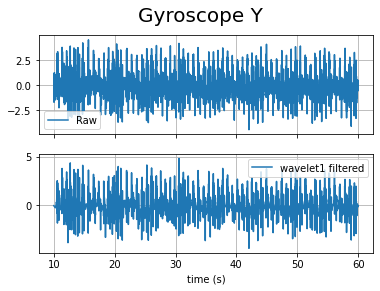

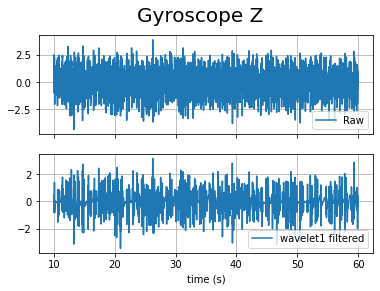

2625.662322524369


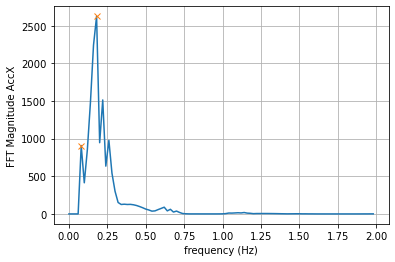

Peak frequencies =  [0.08 0.18]
RR (bpm) =  10.799999999999999
716.3642005060863


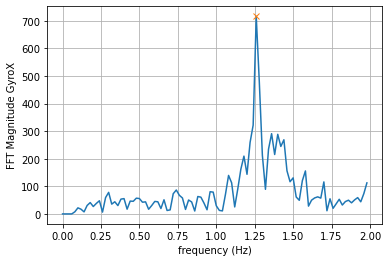

Peak frequencies =  [1.26]
HR (bpm) =  75.6
410.685897570976


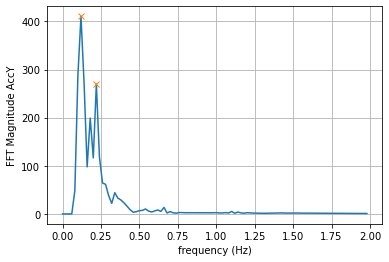

Peak frequencies =  [0.12 0.22]
RR (bpm) =  13.2
1491.297103885248


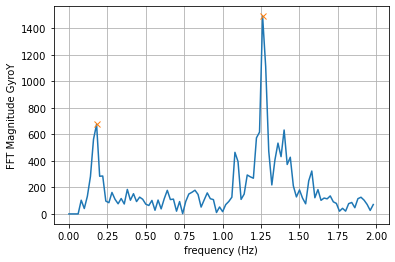

Peak frequencies =  [0.18 1.26]
HR (bpm) =  75.6
RR (bpm) =  10.799999999999999
115.6114247599039


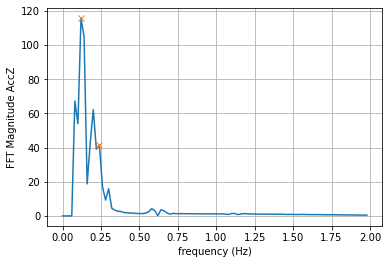

Peak frequencies =  [0.12 0.24]
RR (bpm) =  14.399999999999999
582.6127529717392


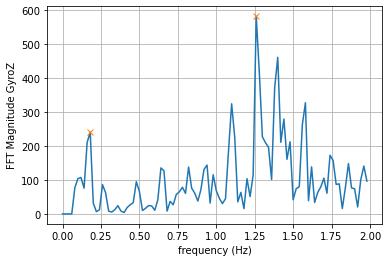

Peak frequencies =  [0.18 1.26]
HR (bpm) =  75.6
RR (bpm) =  10.799999999999999
HR frequencies: [75.6, 75.6, 81.60000000000001, 75.6, 85.19999999999999, 75.6, 75.6, 75.6, 75.6, 75.6, 75.6]
RR frequencies: [10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 10.799999999999999, 13.2, 10.799999999999999, 4.8, 10.799999999999999, 10.799999999999999, 13.2, 10.799999999999999, 14.399999999999999, 10.799999999999999]


In [20]:
import pywt

def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

wavelettryed = ['bior5.5']

AccWaveLetDeNoised_1 = np.zeros(Acc_signals.shape)
GyroWaveLetDeNoised_1 = np.zeros(Gyro_signals.shape)


#choose_source_signal = 'fft filtered'
#choose_source_signal = 'butter filtered'
choose_source_signal = 'normalized not filtered'

if choose_source_signal == 'fft filtered':
    Acc_signals = Acc_fftfiltered
    Gyro_signals = Gyro_fftfiltered
elif choose_source_signal == 'butter filtered':
    Acc_signals = Accelerations_butterfiltered
    Gyro_signals = Gyroscopes_butterfiltered
else:
    Acc_signals = Accelerations_scaled
    Gyro_signals = Gyroscopes_scaled


#for wav in pywt.wavelist():
for wav in wavelettryed:
    for i in range(3):
        try:
            AccWaveLetDeNoised_1[:,i] = wavelet_denoising(Acc_signals[:,i], wavelet=wav, level=1)
        except:
            pass
    
    for i in range(3):
        try:
            GyroWaveLetDeNoised_1[:,i] = wavelet_denoising(Gyro_signals[:,i], wavelet=wav, level=1)
        except:
            pass
    

plotRawandFiltered(times_cleaned, Acc_signals, AccWaveLetDeNoised_1, AccTitles, 'wavelet1')

plotRawandFiltered(times_cleaned, Gyro_signals, GyroWaveLetDeNoised_1, GyroTitles, 'wavelet1')
    
scaler = preprocessing.StandardScaler().fit(AccWaveLetDeNoised_1)
Accelerations_scaled3 = scaler.transform(AccWaveLetDeNoised_1)

scaler = preprocessing.StandardScaler().fit(GyroWaveLetDeNoised_1)
Gyroscopes_scaled3 = scaler.transform(GyroWaveLetDeNoised_1)

fft_Accelerations_scaled, fft_Gyroscopes_scaled = computeFFTs(Accelerations_scaled3, Gyroscopes_scaled3)

# Find FFT peaks and detected HR, RR (plot and print)
HR_frequencies3, RR_frequencies3 = plotAllFFTs(fft_Accelerations_scaled, fft_Gyroscopes_scaled, SamplingInterval)

HR_frequencies.extend(HR_frequencies3)
RR_frequencies.extend(RR_frequencies3)

print("HR frequencies:", HR_frequencies)
print("RR frequencies:", RR_frequencies)

#  3. Filter: Signals denoising with wavelets  (method 2)

**Implement your own filter, trying to extrapolate the respiratory rate signal:\
(c) Explore another method by yourselves**

https://www.section.io/engineering-education/wavelet-transform-analysis-of-1d-signals-using-python/
https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_wavelet

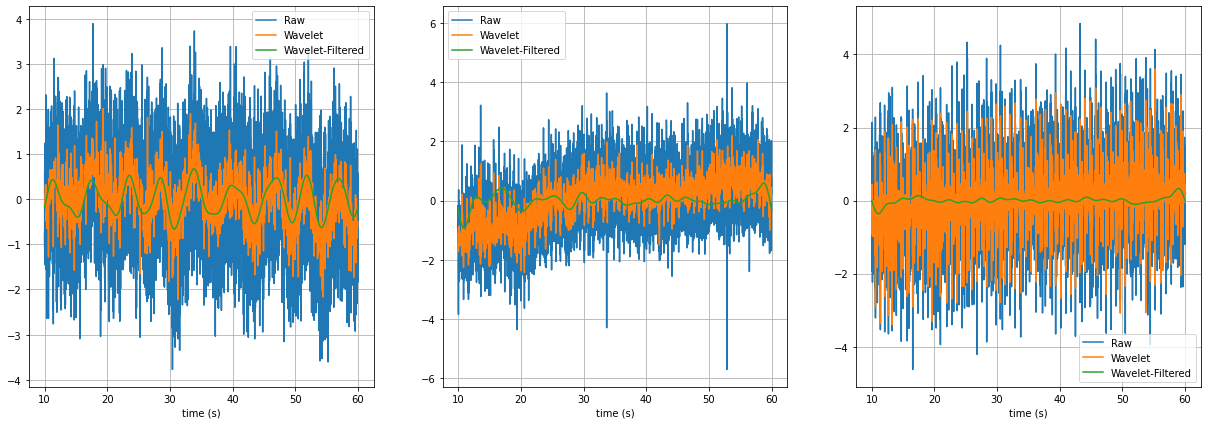

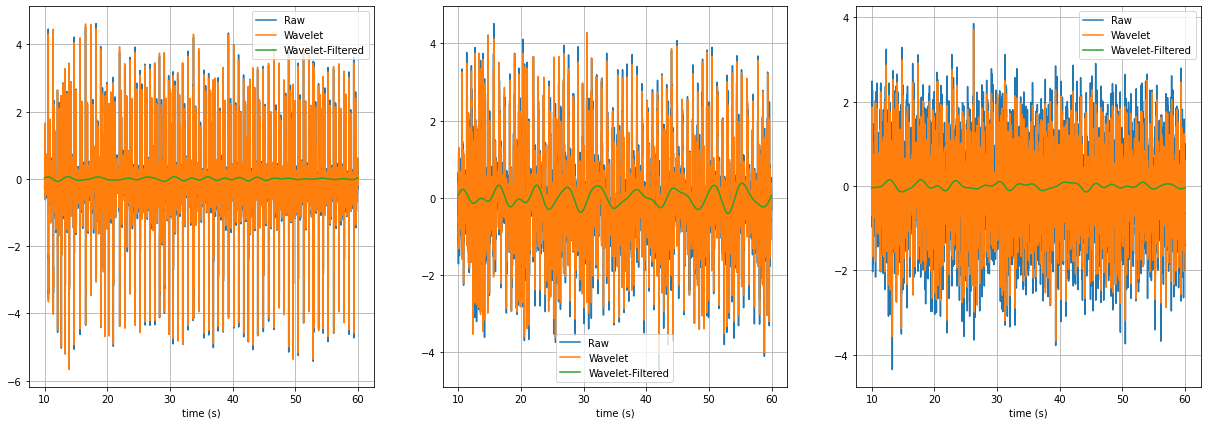

1899.5918441036404


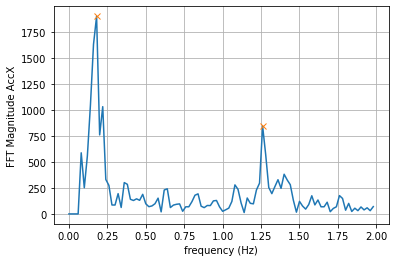

Peak frequencies =  [0.18 1.26]
HR (bpm) =  75.6
RR (bpm) =  10.799999999999999
728.6866214916788


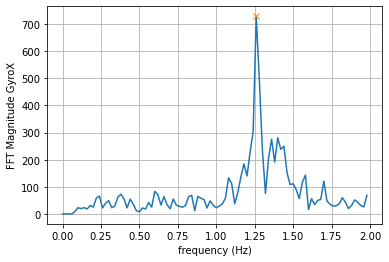

Peak frequencies =  [1.26]
HR (bpm) =  75.6
620.4474660236457


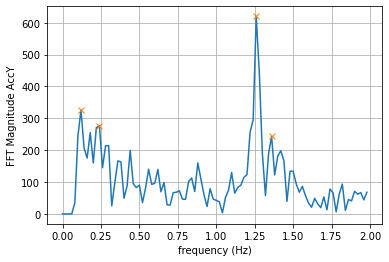

Peak frequencies =  [0.12 0.24 1.26 1.36]
HR (bpm) =  81.60000000000001
RR (bpm) =  14.399999999999999
1375.5906659250884


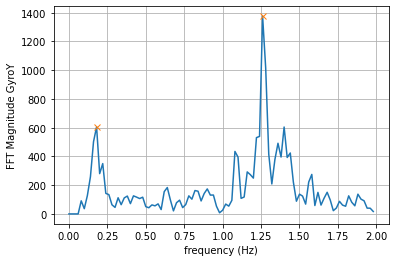

Peak frequencies =  [0.18 1.26]
HR (bpm) =  75.6
RR (bpm) =  10.799999999999999
245.0801280116291


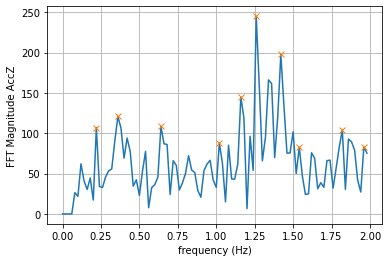

Peak frequencies =  [0.22 0.36 0.64 1.02 1.16 1.26 1.42 1.54 1.82 1.96]
HR (bpm) =  92.4
RR (bpm) =  13.2
813.8457778840449


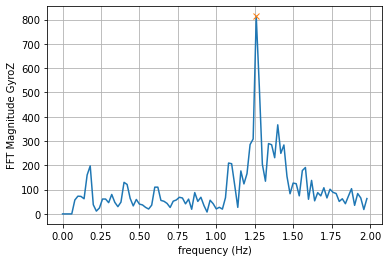

Peak frequencies =  [1.26]
HR (bpm) =  75.6
HR frequencies: [75.6, 75.6, 81.60000000000001, 75.6, 85.19999999999999, 75.6, 75.6, 75.6, 75.6, 75.6, 75.6, 75.6, 75.6, 81.60000000000001, 75.6, 92.4, 75.6]
RR frequencies: [10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2, 10.799999999999999, 10.799999999999999, 13.2, 10.799999999999999, 4.8, 10.799999999999999, 10.799999999999999, 13.2, 10.799999999999999, 14.399999999999999, 10.799999999999999, 10.799999999999999, 14.399999999999999, 10.799999999999999, 13.2]


In [21]:
from skimage.restoration import denoise_wavelet

choose_source_signal = 'fft filtered'
#choose_source_signal = 'butter filtered'
choose_source_signal = 'normalized not filtered'

if choose_source_signal == 'fft filtered':
    Acc_signals = Acc_fftfiltered
    Gyro_signals = Gyro_fftfiltered
elif choose_source_signal == 'butter filtered':
    Acc_signals = Accelerations_butterfiltered
    Gyro_signals = Gyroscopes_butterfiltered
else:
    Acc_signals = Accelerations_scaled
    Gyro_signals = Gyroscopes_scaled

AccWaveLetDeNoised = np.zeros(Acc_signals.shape)
AccWaveLet_fftfiltered = np.zeros(Acc_signals.shape)
fig, axs = plt.subplots(1, 3, figsize= (21,7))
for i in range(3):
    try:
        AccWaveLetDeNoised[:,i] = denoise_wavelet(Acc_signals[:,i], method='BayesShrink', mode='soft', wavelet_levels=5, wavelet='sym8', rescale_sigma='True')
        AccWaveLet_fftfiltered[:,i] = fftFilter(AccWaveLetDeNoised[:,i], freqCut)
    except:
        pass
    axs[i].plot(times_cleaned, Acc_signals[:,i], label='Raw')
    axs[i].plot(times_cleaned, AccWaveLetDeNoised[:,i], label='Wavelet')
    axs[i].plot(times_cleaned, AccWaveLet_fftfiltered[:,i], label='Wavelet-Filtered')
    axs[i].set_xlabel('time (s)')
    axs[i].grid('on')
    axs[i].legend()
plt.show()

GyroWaveLetDeNoised = np.zeros(Gyro_signals.shape)
GyroWaveLet_fftfiltered = np.zeros(Gyro_signals.shape)
fig, axs = plt.subplots(1, 3, figsize= (21,7))
for i in range(3):
    try:
        GyroWaveLetDeNoised[:,i] = denoise_wavelet(Gyro_signals[:,i], method='BayesShrink', mode='soft', wavelet_levels=5, wavelet='sym8', rescale_sigma='True')
        GyroWaveLet_fftfiltered[:,i] = fftFilter(GyroWaveLetDeNoised[:,i], freqCut)
    except:
        pass
    axs[i].plot(times_cleaned, Gyro_signals[:,i], label='Raw')
    axs[i].plot(times_cleaned, GyroWaveLetDeNoised[:,i], label='Wavelet')
    axs[i].plot(times_cleaned, GyroWaveLet_fftfiltered[:,i], label='Wavelet-Filtered')
    axs[i].set_xlabel('time (s)')
    axs[i].grid('on')
    axs[i].legend()
plt.legend()
plt.show()

scaler = preprocessing.StandardScaler().fit(AccWaveLetDeNoised)
Accelerations_scaled4 = scaler.transform(AccWaveLetDeNoised)

scaler = preprocessing.StandardScaler().fit(GyroWaveLetDeNoised)
Gyroscopes_scaled4 = scaler.transform(GyroWaveLetDeNoised)

fft_Accelerations_scaled, fft_Gyroscopes_scaled = computeFFTs(Accelerations_scaled4, Gyroscopes_scaled4)

# Find FFT peaks and detected HR, RR (plot and print)
HR_frequencies4, RR_frequencies4 = plotAllFFTs(fft_Accelerations_scaled, fft_Gyroscopes_scaled, SamplingInterval)

HR_frequencies.extend(HR_frequencies4)
RR_frequencies.extend(RR_frequencies4)

print("HR frequencies:", HR_frequencies)
print("RR frequencies:", RR_frequencies)

# 4. Metrics: RPM & RRV



**4.1. Respiratory Rate Per Minute (RPM): extrapolate RPM, and make an histogram of the result\
4.2. Respiratory Rate Variability (RRV): extrapolate RRV, explain why this parameter is important, and plot the results**

**Respiratory Rate Variability (RRV)**:  is a measure of the fluctuation in breathing patterns over time and it is an important indicator of the respiratory system's control and regulation. A low RRV is associated with a poorly regulated breathing pattern, while a high RRV is associated with a well-regulated breathing pattern. 

**RRV is an important parameter** in the medical field because it provides valuable information about the functioning of the respiratory system, which is closely linked to overall health and well-being. For example:
-	Monitoring of respiratory distress.
-	Diagnosis of sleep disorders.
-	Evaluation of respiratory muscle function.
-	Assessment of autonomic nervous system function.

# • Method 1 : rpm_plot

In [22]:
def rpm_plot(sig, d, show):
    """
    RPM is the respiratory rate per minute.
    RRV is simply a measure of the variation in time between each breathe.
    Plot the cleaned signal with peaks marked.
    Plot the RPM histogram.
    Compute the mean of RRV and plot RRV histogram.
    
    :param sig: cleaned signal of a Gyroscope/Accelerometer component
    :param d: distance
    :param show: if True plot the results, otherwise only return the data
    :return: rpm list, period_RR, RRV_mean
    """
    
    max_peak = sig.max()
    peaks, _ = signal.find_peaks(sig, distance=d ,height=max_peak/3)
    peaks_time = times_cleaned[peaks[:]]

    
    period_RR = np.zeros(len(peaks_time)-1)
    for i in range(period_RR.shape[0]):
        period_RR[i] = peaks_time[i+1] - peaks_time[i]
        
    rpm = 60 / period_RR
    RRV_mean = np.mean(period_RR)
    
    if show == True:
        plt.plot(times_cleaned, sig,label='signal')
        plt.plot(times_cleaned[peaks[:]], sig[peaks[:]], 'x')
        plt.title('Cleaned Signal with marked peaks')
        plt.legend()
        plt.show()
        
        plt.hist(rpm,label='RPM',edgecolor='black')
        plt.title('Respiratory Rate Per Minute (RPM)')
        plt.grid('on')
        plt.legend()
        plt.show()
        
        plt.hist(period_RR,label='RRV',edgecolor='black')
        plt.title('Respiratory Rate Variability (RRV)')
        plt.grid('on')
        plt.axvline(RRV_mean,linestyle='--',color='red',label='RRV_mean')
        plt.legend()
        plt.show()
    
    return rpm,period_RR,RRV_mean

In [23]:
if dataselector == 0:
    acc = AccWaveLet_fftfiltered[:,0]
    gyro = GyroWaveLet_fftfiltered[:,1]
elif dataselector ==3:
    acc = AccWaveLet_fftfiltered[:,2]
    gyro = GyroWaveLet_fftfiltered[:,2]

**Application of rpm_plot on the Accelerometer component**

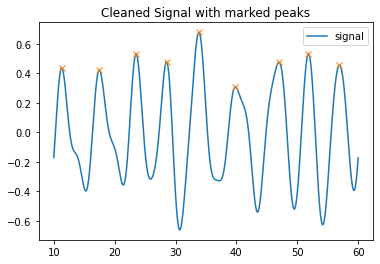

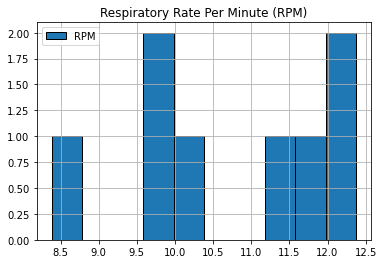

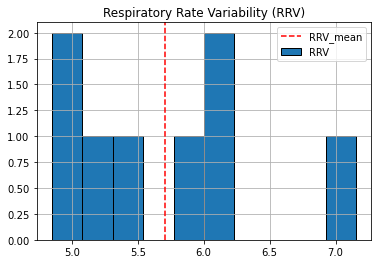

Avarage rpm: 10.684880405115674
Avarage RRV: 5.703683035714285


In [24]:
if dataselector == 0:
    rpmAcc, period_RRAcc, RRV_meanAcc = rpm_plot(acc, 1000, True)
elif dataselector == 3:
    rpmAcc, period_RRAcc, RRV_meanAcc = rpm_plot(acc, 100, True)

print("Avarage rpm:", np.mean(rpmAcc))
print("Avarage RRV:", RRV_meanAcc)

**Application of rpm_plot on the Gyroscope component**

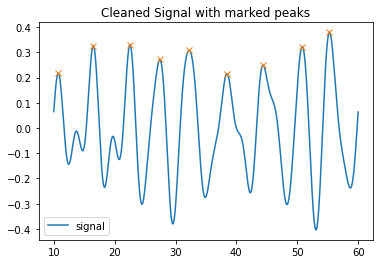

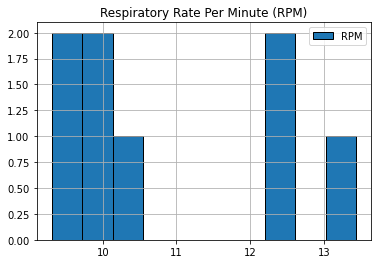

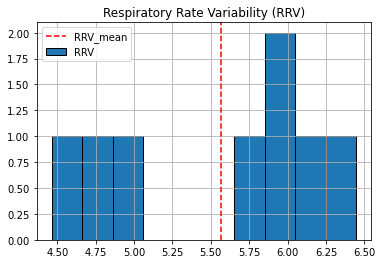

Avarage rpm: 10.95114368501482
Avarage RRV: 5.568638392857143


In [25]:
if dataselector == 0:
     rpmGyro, period_RRGyro, RRV_meanGyro = rpm_plot(gyro, 800, True)
elif dataselector == 3:
    rpmGyro, period_RRGyro, RRV_meanGyro = rpm_plot(gyro, 100, True)

print("Avarage rpm:", np.mean(rpmGyro))
print("Avarage RRV:", RRV_meanGyro)

In order to have more representative histograms, rpm and rrv of the negative of Accelerometer x-component and Gyroscope y-component are calculated. Results are merged together and a final RPM and RRV histgram is plotted.

Avarage RRV: 5.640345982142857
Avarage rpm: 10.823081996351666


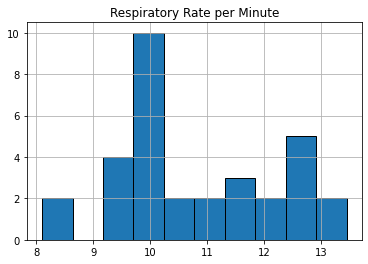

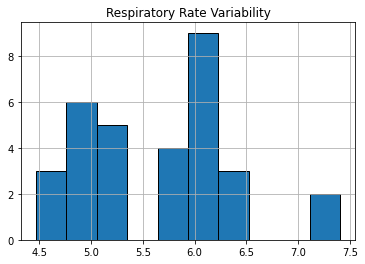

In [26]:
if dataselector == 0:
    acc1_rpm, acc1_rr, _ = rpm_plot(acc, 1000, False)
    gyro1_rpm, gyro1_rr, _ = rpm_plot(gyro, 800, False)
    acc2_rpm, acc2_rr, _ = rpm_plot(-acc, 500, False)
    gyro2_rpm, gyro2_rr, _ = rpm_plot(-gyro, 600, False)

if dataselector == 3:
    acc1_rpm, acc1_rr, _ = rpm_plot(acc, 100, False)
    gyro1_rpm, gyro1_rr, _ = rpm_plot(gyro, 100, False)
    acc2_rpm, acc2_rr, _ = rpm_plot(-acc, 100, False)
    gyro2_rpm, gyro2_rr, _ = rpm_plot(-gyro, 100, False)

RR_period = np.concatenate((acc1_rr, gyro1_rr, acc2_rr, gyro2_rr))
rpm = np.concatenate((acc1_rpm, gyro1_rpm, acc2_rpm, gyro2_rpm))
print("Avarage RRV:", np.mean(RR_period))
print("Avarage rpm:", np.mean(rpm))

plt.hist(rpm,edgecolor='black')
plt.title('Respiratory Rate per Minute')
plt.grid('on')
plt.show()

plt.hist(RR_period,edgecolor='black')
plt.title('Respiratory Rate Variability')
plt.grid('on')
plt.show()

# • Method 2 - neurokit2

https://neuropsychology.github.io/NeuroKit/examples/rsp_rrv/rsp_rrv.html?highlight=rsp_rrv

In [27]:
import neurokit2 as nk

def rsp_calc(rsp,rate):
    """
    rsp_calc use neurokit2 functions to clean the signal if it is not cleaned.
    Find and plot peaks of given signal.
    Plot respiratory rate per minute.
    A Poincaré plot is also shown, plotting each breath-to-breath interval against the next successive one. 
    It shows the distribution of successive respiratory rates.
    Outputs a variety of RRV indices including time domain, frequency domain, and nonlinear features.
    
    :param rsp: respiration signal (Accelerometer/Gyroscope components)
    :param rate: sampling rate
    :return: rrv indices
    """
    
    nk.signal_plot(rsp, sampling_rate=rate)
    
    # Clean signal
    cleaned = nk.rsp_clean(rsp, sampling_rate=rate)
    
    # Extract peaks
    df, peaks_dict = nk.rsp_peaks(cleaned) 
    info = nk.rsp_fixpeaks(peaks_dict)
    formatted = nk.signal_formatpeaks(info, desired_length=len(cleaned),peak_indices=info["RSP_Peaks"])
    candidate_peaks = nk.events_plot(peaks_dict['RSP_Peaks'], cleaned)
    fixed_peaks = nk.events_plot(info['RSP_Peaks'], cleaned)
    
    # Extract rate
    rsp_rate = nk.rsp_rate(cleaned, peaks_dict, sampling_rate=rate)
   
    # Visualize
    nk.signal_plot(rsp_rate, sampling_rate=rate)
    plt.ylabel('Breaths Per Minute')
    plt.show()

    rrv = nk.rsp_rrv(rsp_rate, info, sampling_rate=rate,show=False)
    rrv
    plt.hist(rsp_rate,edgecolor='black')
    plt.title('Respiratory Rate Variability')
    plt.grid('on')
    plt.show()
    
    return rrv

**Application of rpm_plot on the Accelerometer component**

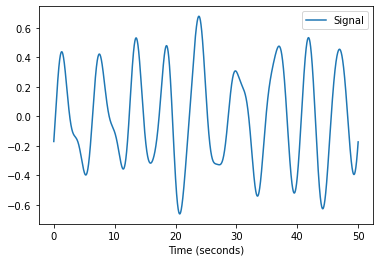

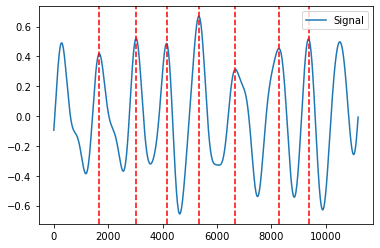

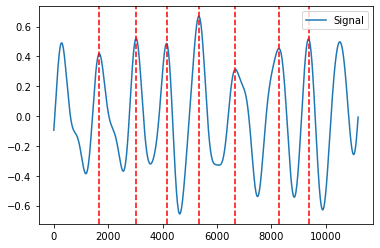

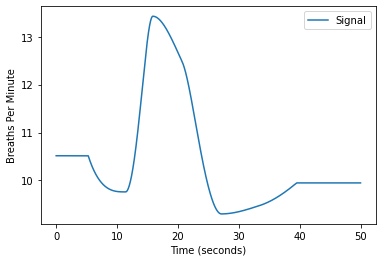

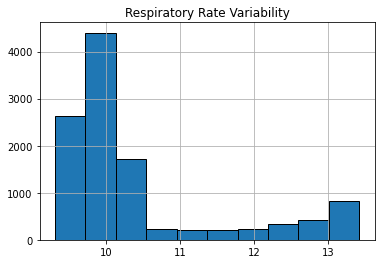

,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn
0,1071.045318,5706.10119,846.447486,1197.183764,0.148341,0.187702,6089.285714,446.765625,0.073369,NaN,0.009335,0.000523,17.840361,NaN,NaN,846.536758,846.358206,0.999789,0.223144,-inf


In [28]:
rsp_calc(acc, newFreq)

**Application of rpm_plot on the Gyroscope component**

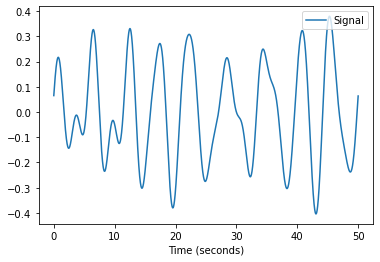

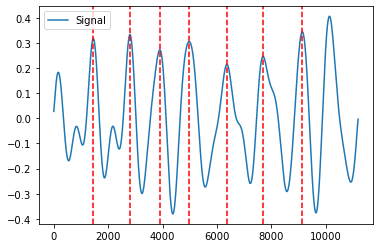

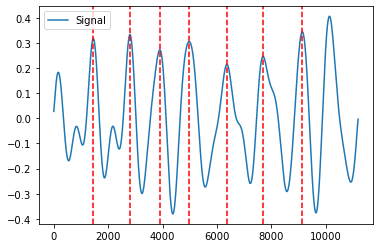

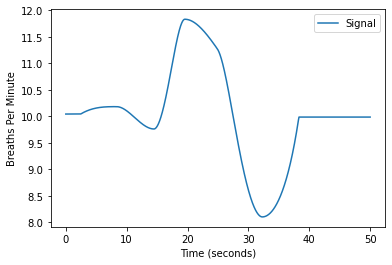

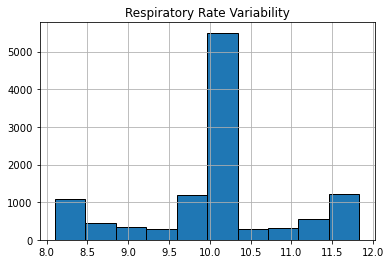

,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn
0,1231.566894,5974.702381,816.047332,1376.689014,0.136584,0.20613,5950.892857,612.234375,0.102881,NaN,0.007151,0.000229,31.217113,NaN,NaN,973.466137,619.86303,0.636759,0.223144,-inf


In [29]:
rsp_calc(gyro, newFreq)

# 6. Conclusion

**Summarise the obtained results**

In [30]:
HR_freqs = np.array(HR_frequencies)
RR_freqs = np.array(RR_frequencies)
sort_HR_freques = np.sort(HR_freqs)
sort_RR_freques = np.sort(RR_freqs)

#select the HR frequency that is detected more times
uniqueHRfreq, countUniqueHRfreq = np.unique(sort_HR_freques, return_counts=True)
print("Heart rate frequency:", uniqueHRfreq[countUniqueHRfreq.argmax()])

#select the RR frequency that is detected more times
uniqueRRfreq, countUniqueRRfreq = np.unique(sort_RR_freques, return_counts=True)
print("Respiratory rate frequency:", uniqueRRfreq[countUniqueRRfreq.argmax()])

Heart rate frequency: 75.6
Respiratory rate frequency: 10.799999999999999


**Specifically make a comparison between the two files analysed**

In [31]:
#compare the two files analysed via SNR
if dataselector == 0:
    print("SNRs of RR from acceleration signal of dataset 'center_sternum.txt':", SNRacc0)
    print("SNRs of RR from gyroscope signal of dataset 'center_sternum.txt':", SNRgyro0)
elif dataselector == 3:
    print("SNRs of RR from acceleration signal of dataset '3_Subject_sitting_chair.txt':", SNRacc3)
    print("SNRs of RR from gyroscope signal of dataset '3_Subject_sitting_chair.txt':", SNRgyro3)

SNRs of RR from acceleration signal of dataset 'center_sternum.txt': [ -9.07126057 -12.80401914 -20.87356177]
SNRs of RR from gyroscope signal of dataset 'center_sternum.txt': [-29.84091747 -14.08686171 -23.74137087]
